In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yfin
yfin.pdr_override()

In [2]:
data = pdr.DataReader('RELIANCE.NS', source = 'yahoo', start = '2017-1-1')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,536.910645,539.882446,531.140320,537.455444,522.123230,3275674
2017-01-03,539.808167,543.349609,535.474243,539.585266,524.192322,2969384
2017-01-04,541.318848,541.368347,527.153137,528.564758,513.486206,4796129
2017-01-05,530.471680,534.879883,529.357239,533.641602,518.418091,4030815
2017-01-06,532.056641,537.405945,531.511780,532.428101,517.239319,3620853
...,...,...,...,...,...,...
2022-09-02,2560.399902,2575.350098,2525.699951,2530.500000,2530.500000,5999196
2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785
2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,536.910645,539.882446,531.140320,537.455444,522.123230,3275674
2017-01-03,539.808167,543.349609,535.474243,539.585266,524.192322,2969384
2017-01-04,541.318848,541.368347,527.153137,528.564758,513.486206,4796129
2017-01-05,530.471680,534.879883,529.357239,533.641602,518.418091,4030815
2017-01-06,532.056641,537.405945,531.511780,532.428101,517.239319,3620853


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2017-01-02 to 2022-09-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1406 non-null   float64
 1   High       1406 non-null   float64
 2   Low        1406 non-null   float64
 3   Close      1406 non-null   float64
 4   Adj Close  1406 non-null   float64
 5   Volume     1406 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 76.9 KB


In [5]:
prices = data['Adj Close']
prices

Date
2017-01-02     522.123230
2017-01-03     524.192322
2017-01-04     513.486206
2017-01-05     518.418091
2017-01-06     517.239319
                 ...     
2022-09-02    2530.500000
2022-09-05    2569.800049
2022-09-06    2596.850098
2022-09-07    2581.750000
2022-09-08    2585.500000
Name: Adj Close, Length: 1406, dtype: float64

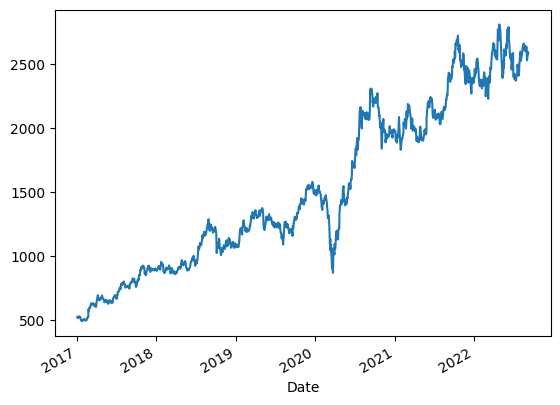

In [6]:
prices.plot()
plt.show()

In [7]:
prices = prices.to_frame()

In [8]:
prices['7_Day_MA'] = (prices['Adj Close'] + prices['Adj Close'].shift(1) + prices['Adj Close'].shift(2) + prices['Adj Close'].shift(3) + prices['Adj Close'].shift(4) + prices['Adj Close'].shift(5) + prices['Adj Close'].shift(6))/7
prices

,Adj Close,7_Day_MA
Date,,
2017-01-02,522.123230,NaN
2017-01-03,524.192322,NaN
2017-01-04,513.486206,NaN
2017-01-05,518.418091,NaN
2017-01-06,517.239319,NaN
...,...,...
2022-09-02,2530.500000,2602.328544
2022-09-05,2569.800049,2592.335693
2022-09-06,2596.850098,2587.307129


Calculating the Beta of the stock and then the expected rate of return and finally the sharpe ratio.

In [9]:
tickers = ['RELIANCE.NS','^NSEI']
data3 = pd.DataFrame()
for t in tickers:
    data3[t] = pdr.DataReader(t, start = '2017-1-1', source = 'yahoo')['Adj Close']
data3

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,RELIANCE.NS,^NSEI
Date,,
2017-01-02,522.123230,8179.500000
2017-01-03,524.192261,8192.250000
2017-01-04,513.486206,8190.500000
2017-01-05,518.418152,8273.799805
2017-01-06,517.239258,8243.799805
...,...,...
2022-09-02,2530.500000,17539.449219
2022-09-05,2569.800049,17665.800781
2022-09-06,2596.850098,17655.599609


In [10]:
log_rets = np.log(data3/data3.shift(1))
log_rets

,RELIANCE.NS,^NSEI
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.003955,0.001558
2017-01-04,-0.020635,-0.000214
2017-01-05,0.009559,0.010119
2017-01-06,-0.002277,-0.003632
...,...,...
2022-09-02,-0.011747,-0.000191
2022-09-05,0.015411,0.007178
2022-09-06,0.010471,-0.000578


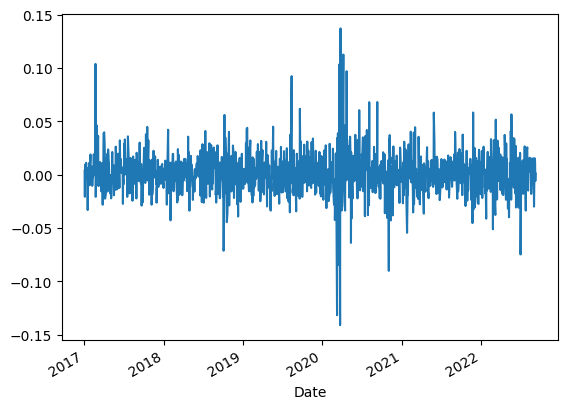

In [11]:
log_rets['RELIANCE.NS'].plot()
plt.show()

On average, the stockmarket opens on 250 days in a year

In [12]:
cov = log_rets.cov()*250
cov

,RELIANCE.NS,^NSEI
RELIANCE.NS,0.095596,0.037149
^NSEI,0.037149,0.034084


In [13]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.03714890282752251

In [14]:
market_var = log_rets['^NSEI'].var()*250
market_var

0.03408371915661504

In [15]:
rel_beta = cov_with_market/market_var
rel_beta

1.0899310212252051

Calculating Free Risk Premium

In [16]:
rfm = log_rets['^NSEI'].mean()*250
rfm

0.13597890739605853

In [17]:
exp_ret = 0.0675 + rel_beta*(rfm - 0.0675)
exp_ret

0.1421372854705723

Sharpe Ratio

In [18]:
sr = (exp_ret - 0.0675)/(log_rets['RELIANCE.NS'].std()*250**0.5)
sr

0.24139866990130723

Monte Carlo Simulation on Reliance Stock

In [19]:
from scipy.stats import norm
rel_mean_d = log_rets['RELIANCE.NS'].mean()
rel_var_d = log_rets['RELIANCE.NS'].var()

#drift = avg daily return + 1/2(Variance)

drift = rel_mean_d + 0.5*rel_var_d
drift

0.0013296682682936182

In [20]:
rel_std = log_rets['RELIANCE.NS'].std()

drift = np.array(drift)
rel_std = np.array(rel_std)

In [21]:
t_interval = 1000
iterations = 10
x = np.random.rand(t_interval, iterations)

daily_returns = np.exp(drift + rel_std*norm.ppf(x))

In [22]:
S0 = data3['RELIANCE.NS'].iloc[-1]
price = np.zeros_like(daily_returns)
price[0] = S0
price

array([[2584.94995117, 2584.94995117, 2584.94995117, ..., 2584.94995117,
        2584.94995117, 2584.94995117],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

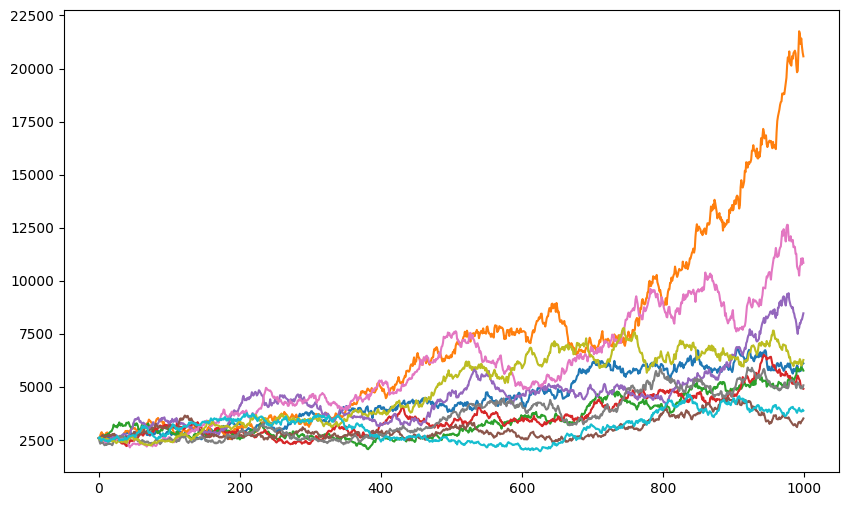

In [23]:
for t in range (1, t_interval):
    price[t] = price[t-1]*daily_returns[t]
    
plt.figure(figsize = (10,6))
plt.plot (price)